<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Question 1 - Is there a significant difference in the median value of houses bounded by the Charles river or not?

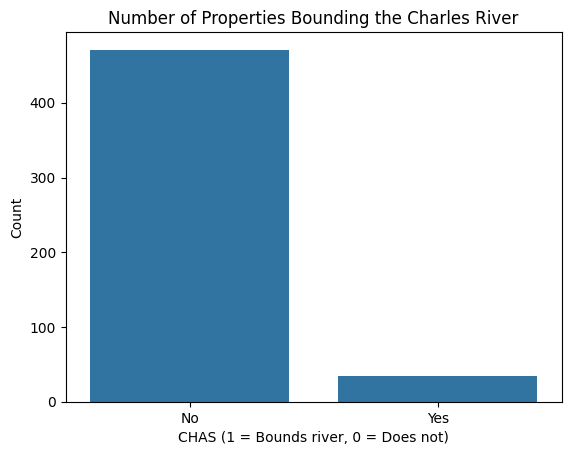

In [7]:
sns.countplot(data=boston_df, x='CHAS')

pyplot.title('Number of Properties Bounding the Charles River')
pyplot.xlabel('CHAS (1 = Bounds river, 0 = Does not)')
pyplot.ylabel('Count')
pyplot.xticks([0, 1], ['No', 'Yes'])
pyplot.show()

State the hypothesis
* $H_0: µ_1 = µ_2$ ("there is no difference inmedian value of houses bounded by the Charles river or not")
* $H_1: µ_1 ≠ µ_2$ ("there is a difference inmedian value of houses bounded by the Charles river or not")


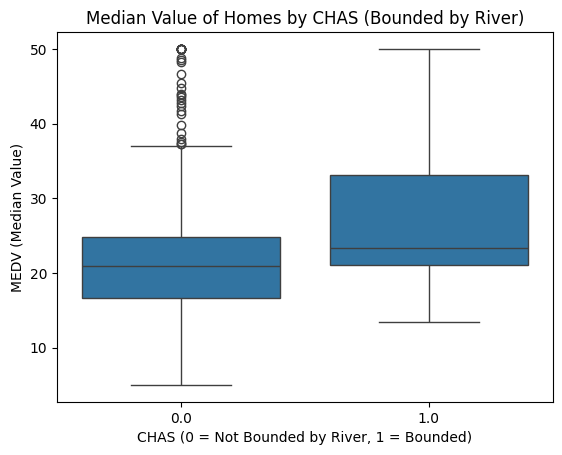

In [8]:
sns.boxplot(x='CHAS', y='MEDV', data=boston_df)

pyplot.title('Median Value of Homes by CHAS (Bounded by River)')
pyplot.xlabel('CHAS (0 = Not Bounded by River, 1 = Bounded)')
pyplot.ylabel('MEDV (Median Value)')
pyplot.show()

In [9]:
df_chas_0 = boston_df[boston_df['CHAS'] == 0]
df_chas_1 = boston_df[boston_df['CHAS'] == 1]
scipy.stats.ttest_ind(df_chas_0['MEDV'], df_chas_1['MEDV'], equal_var = True)

TtestResult(statistic=np.float64(-3.996437466090509), pvalue=np.float64(7.390623170519905e-05), df=np.float64(504.0))

**Conclusion**: Since p-value is less than 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in the houses value if they are bounded or not by the Charles river

#### Question 2 - Is there a difference in median values (MEDV) of houses of each proportion of owner-occupied units built before 1940 (AGE)?

State the hypothesis
* $H_0: µ_1 = µ_2$ ("there is no difference in median values of houses owner-occupied before 1940")
* $H_1:$ At least one of the median differs


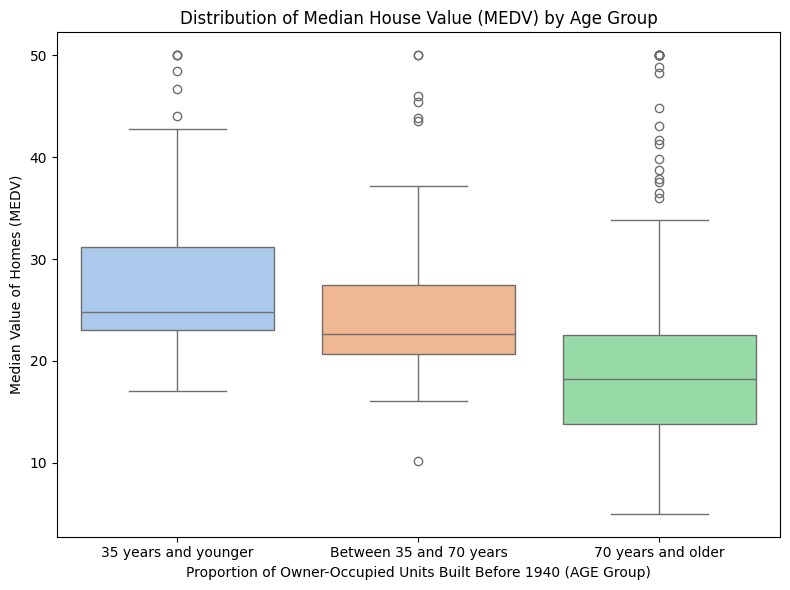

In [10]:
boston_df['AGE_group'] = pd.cut(
    boston_df['AGE'],
    bins=[0, 35, 70, 100],
    labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older']
)

pyplot.figure(figsize=(8, 6))
sns.boxplot(
    data=boston_df,
    x='AGE_group',
    y='MEDV',
    hue='AGE_group',
    palette='pastel',
    legend=False 
)

pyplot.title('Distribution of Median House Value (MEDV) by Age Group')
pyplot.xlabel('Proportion of Owner-Occupied Units Built Before 1940 (AGE Group)')
pyplot.ylabel('Median Value of Homes (MEDV)')
pyplot.tight_layout()
pyplot.show()

In [12]:
young = boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV']
middle = boston_df[boston_df['AGE_group'] == 'Between 35 and 70 years']['MEDV']
old = boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(young, middle, old)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion**: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

#### Question 3 - Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

State the hypothesis:
* $H_0:$ Nitric oxide concentrations is not correlated with beauty  the proportion of non-retail business acres per town
* $H_1:$ Nitric oxide concentrations is correlated with beauty  the proportion of non-retail business acres per town


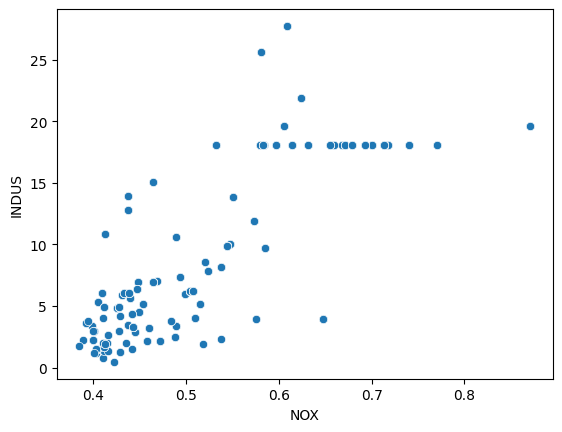

In [16]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

In [19]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241263e-98))

**Conclusion:** Since the p-value  is less than 0.05, we reject the Null hypothesis and conclude that there exists a relationship between  Nitric oxide concentrations and the the proportion of non-retail business acres per town.

#### Question 4 - What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

State the hypothesis:

* $H_0: β1$ = 0 (Weighted distances have no effect on teaching  median value of owner-occupied homes)
* $H_1: β1$ is not equal to 0 (Weighted distances have effect on teaching  median value of owner-occupied homes)

In [20]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        22:57:08   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** The  p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that the weighted distances have effect on teaching median value of owner-occupied homes

#### Question 5 - Create a histogram for the pupil to teacher ratio variable

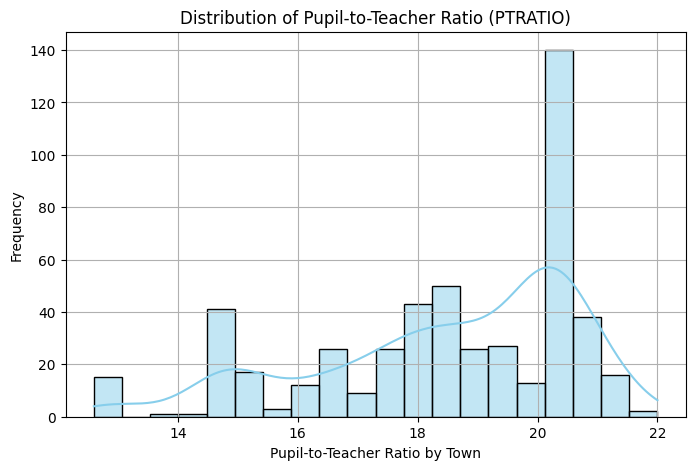

In [28]:
pyplot.figure(figsize=(8, 5))
sns.histplot(
    data=boston_df,
    x='PTRATIO',
    bins=20,         # Adjust bins for detail
    kde=True,        # Smooth curve overlay
    color='skyblue',
    edgecolor='black'
)
pyplot.title('Distribution of Pupil-to-Teacher Ratio (PTRATIO)')
pyplot.xlabel('Pupil-to-Teacher Ratio by Town')
pyplot.ylabel('Frequency')
pyplot.grid(True)
pyplot.show()